# Introduction to neural network calssification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)

In [2]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Our data is a little hard to understand right now... let's visualize it!

In [4]:
import pandas as pd

circles = pd.DataFrame({
    'X0': X[:, 0],
    'X1': X[:, 1],
    'y': y
})

circles

,X0,X1,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


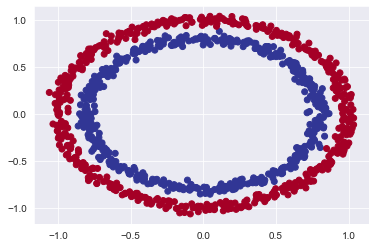

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(
    X[:, 0],
    X[:, 1],
    c=y,
    cmap=plt.cm.RdYlBu
)
plt.show()

## Input and output shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [8]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

the steps in modelling with TensorFlow are typcially:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak the model
6. Evaluate...

In [9]:
import tensorflow as tf

In [10]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the sequential API
model_1 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1)
    ]
)

model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Metal device set to: Apple M1 Pro
Epoch 1/5


2022-08-22 21:29:57.138279: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-22 21:29:57.138404: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-08-22 21:29:57.293471: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-22 21:29:57.722684: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 2s 6ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 5ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 5ms/step - loss: 0.6942 - accuracy: 0.4830


In [11]:
# Let's try and improve our model by training for longer...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5000


2022-08-22 21:30:25.007479: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[0.6934829950332642, 0.5]

Since we are working on a binary classification problem and our model is sgetting around ~50% accruacy.. it's performing like its guessing.

So let's step things up a notch and add an extra layer.

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1),
        tf.keras.layers.Dense(1)
    ]
)

# 2. Compile a model
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

2022-08-22 21:30:25.517537: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [13]:
# 4. Evaluate the model
model_2.evaluate(X, y)


32/32 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.5000


2022-08-22 21:30:38.305103: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[0.6933314204216003, 0.5]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might want to add more layers or increase the number of hidden units
2. Compile a model - Here we might want to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - Perhaps we might fit our model for more epochs (leave it training for longer)

In [14]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model (this time 3 layers)
model_3 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100),  # add 100 dense neurons
        tf.keras.layers.Dense(10), # add another layer with 10 neurons
        tf.keras.layers.Dense(1)
    ]
)

# 2. Compile the mode
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

2022-08-22 21:30:38.904268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [15]:
# Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 5ms/step - loss: 0.6980 - accuracy: 0.5090


2022-08-22 21:30:56.427785: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[0.6980188488960266, 0.5090000033378601]

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features and labels
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between the zones (where each unique class falls)

In [16]:
import numpy as np

In [17]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model prediction on X
    """
    # Define the axis boundaries of the plot and create a mesh grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max  = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )

    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()]  # Stack 2d arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multiclass
    if model.output_shape[-1] > 1:
        print('Doing multi-class classification')
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

    else:
        print('Doing binary classification')
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())



 94/313 [========>.....................] - ETA: 0s

2022-08-22 21:30:56.674442: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step
Doing binary classification


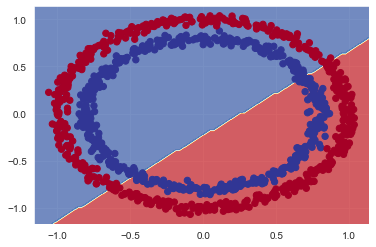

In [18]:
plot_decision_boundary(model_3, X, y)

In [19]:
# Let's see if our model can be used for a regression problem...
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
x_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/Users/georgeharris/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/Users/georgeharris/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/georgeharris/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/Users/georgeharris/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "/Users/georgeharris/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/georgeharris/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/input_spec.py", line 228, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_2" (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer "sequential_2" (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int32)
      • training=True
      • mask=None


Oh wait... we compiled our model for a binary classification problem.

But.. we're now working on a regression problem, let's change the model to suit our data.

In [20]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model (this time 3 layers)
model_3 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100, input_shape=[1]),  # add 100 dense neurons
        tf.keras.layers.Dense(10), # add another layer with 10 neurons
        tf.keras.layers.Dense(1)
    ]
)

# 2. Compile the mode - with a regression loss function
model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

# 3. Fit the model
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100


2022-08-22 21:32:01.789890: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 1s 55ms/step - loss: 248.2148 - mae: 248.2148
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 138.8990 - mae: 138.8990
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 53.1034 - mae: 53.1034
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 73.5182 - mae: 73.5182
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 71.2370 - mae: 71.2370
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 47.0045 - mae: 47.0045
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 45.9373 - mae: 45.9373
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 42.3634 - mae: 42.3634
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 43.6836 - mae: 43.6836
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 42.6201 - mae: 42.6201
Epoch 11/100
5/5 [==============================] - 0s 6ms/step - 

2/2 [==============================] - 0s 9ms/step


2022-08-22 21:32:05.490743: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


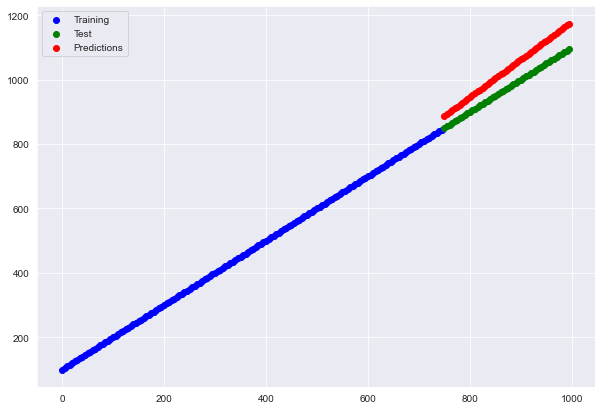

In [21]:
# Make predictions with our trained model
y_reg_pred = model_3.predict(x_reg_test)

# Plot the model's predictions against regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training')
plt.scatter(x_reg_test, y_reg_test, c='g', label='Test')
plt.scatter(x_reg_test, y_reg_pred, c='r', label='Predictions')
plt.legend()

## The missing piece: Non-linearity

In [22]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
    ]
)

# 2. Compile the model
model_4.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
11/32 [=========>....................] - ETA: 0s - loss: 4.8344 - accuracy: 0.4545

2022-08-22 21:32:05.812222: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 6ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 3.9582 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 3.8602 - accuracy: 0.4090
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 3.7907 - accuracy: 0.4090
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 3.7608 - accuracy: 0.4130
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 3.7168 - accuracy: 0.4180
Epoch 11/100
32/32 [=

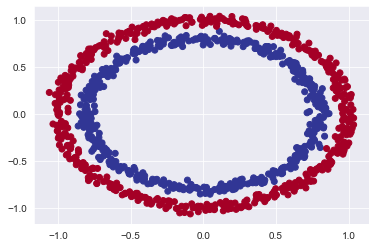

In [23]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

115/313 [==========>...................] - ETA: 0s

2022-08-22 21:32:22.804077: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 1ms/step
Doing binary classification


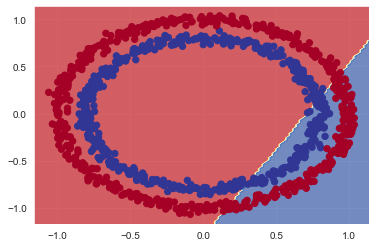

In [24]:
# Check th decision boundary for our latest model
plot_decision_boundary(model_4, X, y)

Let's try to build our first neural network with a non-linear activation function.

In [25]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear actiaviton
model_5 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
    ]
)

# 2. Compile the model
model_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy']
)

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100


/Users/georgeharris/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-08-22 21:32:23.501601: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 6ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 3.9582 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 3.8602 - accuracy: 0.4090
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 3.7907 - accuracy: 0.4090
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 3.7608 - accuracy: 0.4130
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 3.7168 - accuracy: 0.4180
Epoch 11/100
32/32 [=

In [26]:
# Time to replicate the multi-layer neural network from TensorFlow playground in code...

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(4, activation='relu')
    ]
)

# 2. Compile the model
model_6.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# 3. Fit the model
history = model_6.fit(X, y, epochs=250)

Epoch 1/250


2022-08-22 21:32:40.862638: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 1s 7ms/step - loss: 3.2090 - accuracy: 0.0010
Epoch 2/250
32/32 [==============================] - 0s 6ms/step - loss: 2.6774 - accuracy: 0.0050
Epoch 3/250
32/32 [==============================] - 0s 6ms/step - loss: 2.5260 - accuracy: 0.0100
Epoch 4/250
32/32 [==============================] - 0s 6ms/step - loss: 2.4545 - accuracy: 0.0220
Epoch 5/250
32/32 [==============================] - 0s 6ms/step - loss: 2.3271 - accuracy: 0.0420
Epoch 6/250
32/32 [==============================] - 0s 6ms/step - loss: 1.9320 - accuracy: 0.0790
Epoch 7/250
32/32 [==============================] - 0s 6ms/step - loss: 1.6532 - accuracy: 0.1220
Epoch 8/250
32/32 [==============================] - 0s 6ms/step - loss: 1.5984 - accuracy: 0.1320
Epoch 9/250
32/32 [==============================] - 0s 6ms/step - loss: 1.5334 - accuracy: 0.1440
Epoch 10/250
32/32 [==============================] - 0s 6ms/step - loss: 1.4115 - accuracy: 0.1490
Epoch 11/250
32/32 [=

In [27]:
# Evaluate the model
model_6.evaluate(X, y)

24/32 [=====================>........] - ETA: 0s - loss: 0.3311 - accuracy: 0.4792

2022-08-22 21:33:27.555747: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 5ms/step - loss: 0.3332 - accuracy: 0.4770


[0.33320391178131104, 0.47700002789497375]

103/313 [========>.....................] - ETA: 0s

2022-08-22 21:33:27.791264: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 1ms/step
Doing multi-class classification


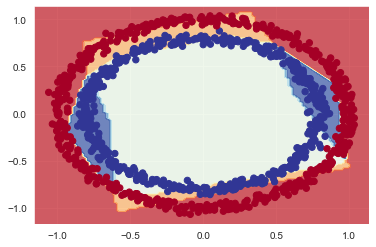

In [28]:
plot_decision_boundary(model_6, X, y)

In [29]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

# 2. Compile the model
model_7.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# 3. Fit the model
model_7.fit(
    X, y,
    epochs=100
)

Epoch 1/100


2022-08-22 21:33:28.611165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 1s 7ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/100
32/32 [=

In [30]:
# Evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 5ms/step - loss: 0.2949 - accuracy: 0.9910


2022-08-22 21:33:48.035729: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[0.29486289620399475, 0.9910000562667847]

 74/313 [======>.......................] - ETA: 0s

2022-08-22 21:33:48.266400: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step
Doing binary classification


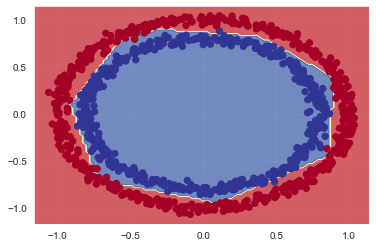

In [31]:
# Let's visualize our incredible metrics
plot_decision_boundary(model_7, X, y)

**Question:** What is wrong with the predictions we have made? Are we really evaluating our model correctly? Hint: What data did we learn on and what data did we predict on?

**Answer:** The predictions we made are using the same X data we used to train. Ideally, we would have three sets, a training, testing and validation set. We use the training to build the model, and the validation set to test each experiment and when we have made the best model we can, we test against the test set. This means our test set never touches the model until we are ready to test completely.

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action.

In [32]:
# Create a toy tensor (similar to the data we pass into our models)

A = tf.cast(tf.range(-10, 10), tf.float32)

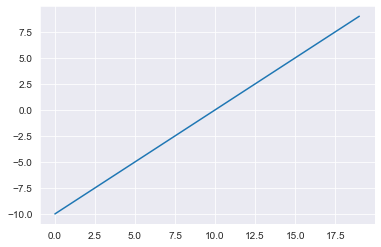

In [33]:
# Visualise our toy tensor
plt.plot(A)

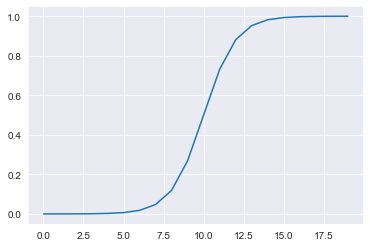

In [34]:
plt.plot(tf.keras.activations.sigmoid(A))

In [35]:
# Let's recreate the relu function
def relu(x):
    return tf.maximum(0, x)

# Pass our toy tensor to our custom relu funciton
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

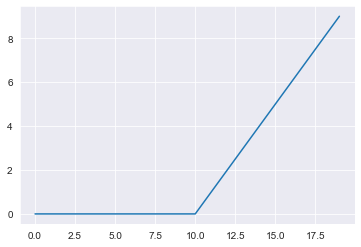

In [36]:
plt.plot(relu(A))

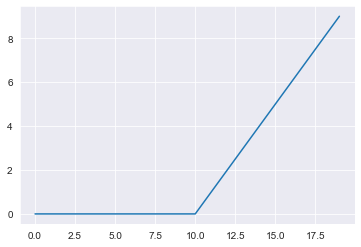

In [38]:
# Alternatively you can just use the tf activation function
plt.plot(tf.keras.activations.relu(A))